In [1]:
import pandas as pd
import numpy as np

In [172]:
x_df = pd.read_csv('cell_painting_modz.tsv', sep = '\t')
x_meta = x_df.iloc[:, :3]
x_df = x_df.iloc[:, 3:]

y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['vb_ros_mean']

In [173]:
median_value = y_df.median()

y_df = pd.Series([1 if x >= median_value else 0 for x in y_df]) # HIGH : 1 / LOW : 0

y_df

0      1
1      1
2      0
3      0
4      0
      ..
352    0
353    1
354    0
355    1
356    1
Length: 357, dtype: int64

In [174]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Data split 
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

# Classification Model Selection
clf = RandomForestClassifier(random_state=42)

# Model Fitting
clf.fit(x_train, y_train)

# Model Prediction
y_pred = clf.predict(x_test)

# Model Assesment
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7638888888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.79      0.68      0.73        34

    accuracy                           0.76        72
   macro avg       0.77      0.76      0.76        72
weighted avg       0.77      0.76      0.76        72



In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse,
        'r2' : r2
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")

# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}, R2 : {metrics['r2']: .4f}")


Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Accuracy for RandomForest: 0.9750

Test Accuracy for RandomForest: 0.9806
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logist

Best Parameters for LogisticRegression:
{'C': 0.1, 'penalty': 'l2'}
Best Cross-validation Accuracy for LogisticRegression: 0.9582

Test Accuracy for LogisticRegression: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

---------------------------------------
Tr

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


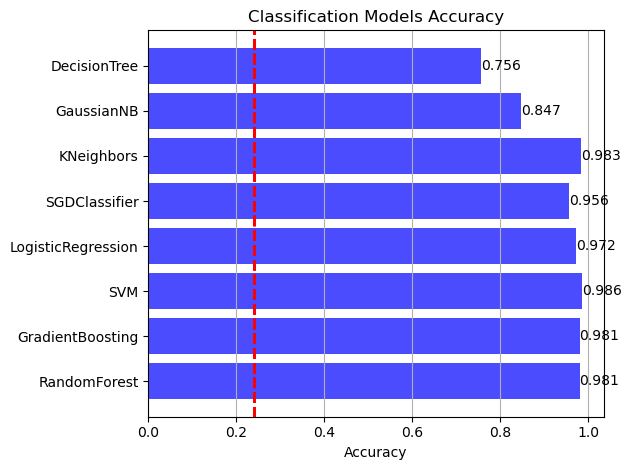

In [128]:
import matplotlib.pyplot as plt


# Accuracy visualization



for model_name, metrics in results.items():
    plt.barh(model_name, metrics['accuracy'], color = 'blue', alpha = 0.7)
    plt.text(accuracy, model_name, f'{accuracy:.3f}', va = 'center')
    plt.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)

    
plt.title('Classification Models Accuracy')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.grid(True, axis = 'x')
plt.savefig('Classification_results.png')
plt.show()


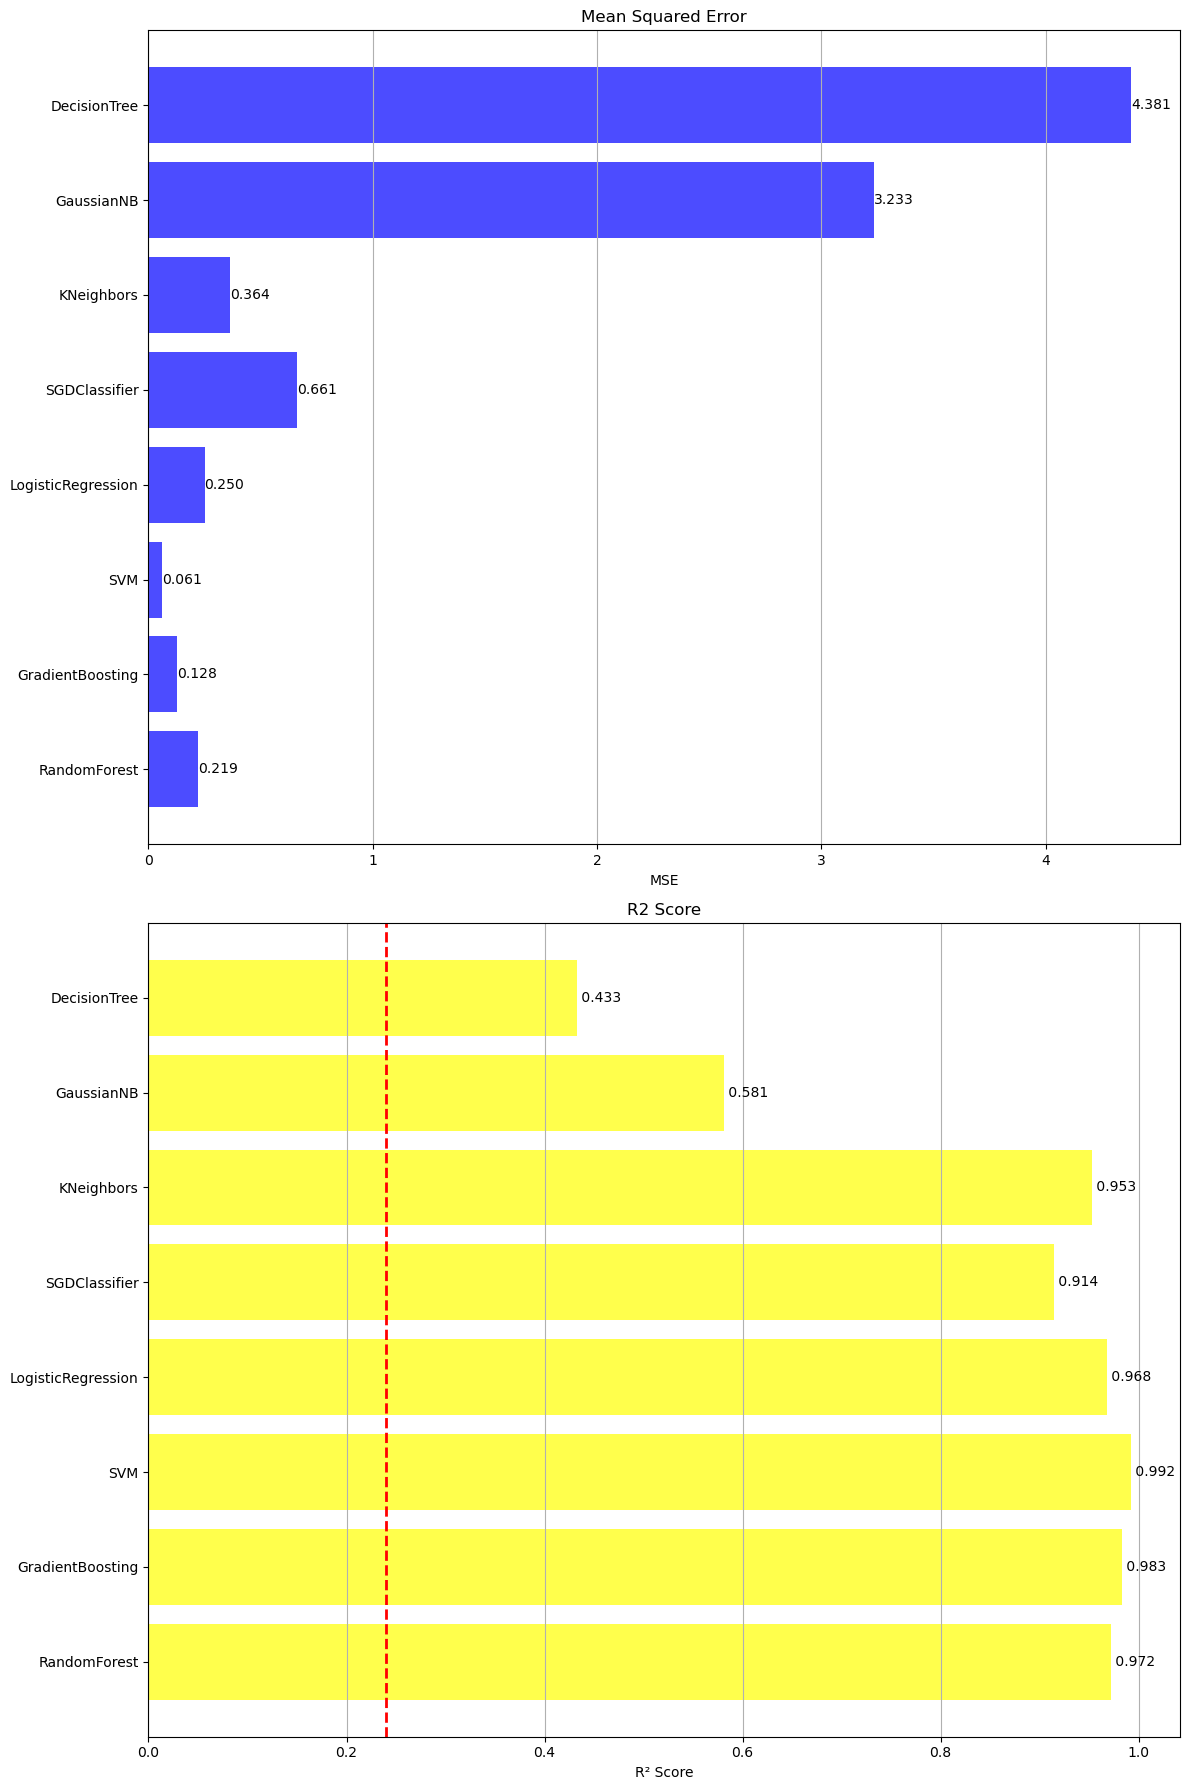

In [163]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 18))

for model, metrics in results.items():
    ax1.barh(model, metrics['mse'], color = 'blue', alpha = 0.7)
    ax1.text(metrics['mse'], model, f"{metrics['mse']:.3f}", va = 'center')
    ax2.barh(model, metrics['r2'], color = 'yellow', alpha = 0.7)
    ax2.text(metrics['r2'], model, f"{metrics['r2']: .3f}", va = 'center')



ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.xaxis.grid(True)

ax2.set_title('R2 Score')
ax2.set_xlabel('R² Score')
ax2.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax2.xaxis.grid(True)

plt.tight_layout()
plt.savefig('X.png')
plt.show()

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [189]:
from tensorflow.keras import regularizers

# Model define
model = keras.Sequential([
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape = (x_train.shape[1],)),
    layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),  
    layers.Dense(1, activation='sigmoid')
])

# Model Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 128)            │       121,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,969 (515.50 KB)

 Trainable params: 131,969 (515.50 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [190]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Model FIT
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5768 - loss: 4.1783 - val_accuracy: 0.7222 - val_loss: 3.8307
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6887 - loss: 3.7574 - val_accuracy: 0.7083 - val_loss: 3.5892
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7742 - loss: 3.3812 - val_accuracy: 0.7222 - val_loss: 3.2988
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7977 - loss: 3.1047 - val_accuracy: 0.7500 - val_loss: 2.9968
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8527 - loss: 2.7866 - val_accuracy: 0.7639 - val_loss: 2.7401
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8447 - loss: 2.5467 - val_accuracy: 0.7917 - val_loss: 2.5538
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8413 - loss: 2.3470 - val_accuracy: 0.8056 - val_loss: 2.3134
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8457 - loss: 2.1789 - val_accuracy: 0.7639 - val_loss: 2.2191

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 2.3011  
Test Accuracy of the Best Model: 0.8056


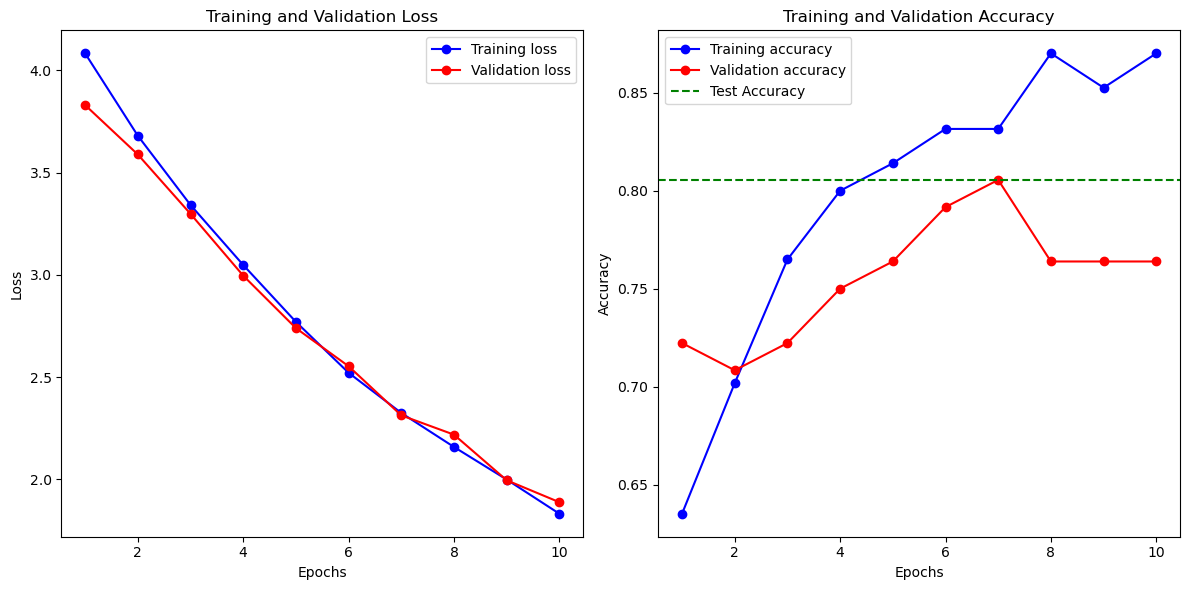

In [192]:
# Save Best Model
best_model = keras.models.load_model('best_model.keras')

# Test data evaluation
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

print(f'Test Accuracy of the Best Model: {test_accuracy:.4f}')

# Assesment scores
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()